# Q1:A retail store wants to identify customers who make frequent purchases. Given the dataset below, write a code to:


In [1]:
import pandas as pd
import numpy as np
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
#1.	Group customers by their IDs.
df=pd.DataFrame(data)
df

,Customer_ID,Purchase_Amount
0,101,200
1,102,150
2,103,180
3,101,220
4,104,300
5,102,200
6,101,100
7,105,400
8,102,250
9,103,300


In [2]:
#1.	Group customers by their IDs.
gropued_cust=df.groupby('Customer_ID')['Purchase_Amount'].sum().reset_index()
gropued_cust

,Customer_ID,Purchase_Amount
0,101,520
1,102,600
2,103,480
3,104,300
4,105,400


In [3]:
#Calculate the total number of purchases per customer.
tot_pur_cust=df.groupby('Customer_ID')['Purchase_Amount'].count().reset_index()
tot_pur_cust

,Customer_ID,Purchase_Amount
0,101,3
1,102,3
2,103,2
3,104,1
4,105,1


In [4]:
#Identify the top 3 frequent customers
top_3=tot_pur_cust.head(3)
top_3

,Customer_ID,Purchase_Amount
0,101,3
1,102,3
2,103,2


# Question 2:A company tracks the daily sales of a product over a month. You are tasked with identifying any abnormal sales data using the IQR (Interquartile Range) method.


In [5]:
data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}
df=pd.DataFrame(data)
df

,Day,Sales
0,1,25
1,2,30
2,3,28
3,4,45
4,5,55
5,6,60
6,7,22
7,8,80
8,9,95
9,10,120


In [6]:
# 1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).
q1=np.percentile(df['Sales'],25)
q3=np.percentile(df['Sales'],75)
print("Q1 is:",q1)
print("Q3 is:",q3)

Q1 is: 31.5
Q3 is: 83.75


In [7]:
#2.Determine the IQR. IQR=q3-q1
IQR=q3-q1
print("IQR is:",IQR)

IQR is: 52.25


In [8]:
#3.. Identify the Lower Bound and Upper Bound.
low_bound=q1-(1.5*IQR)
upp_bound=q3+(1.5*IQR)
print("The lower bound is:",low_bound)
print("The upper bound is:",upp_bound)

The lower bound is: -46.875
The upper bound is: 162.125


In [9]:
#4. Detect and display the outliers.
outliers=df[(df['Sales']<low_bound)|(df['Sales']>upp_bound)]
print("outliers are:",outliers)

outliers are:     Day  Sales
29   30    200


In [10]:
print(df['Sales'])

0      25
1      30
2      28
3      45
4      55
5      60
6      22
7      80
8      95
9     120
10     33
11     29
12     27
13     35
14     40
15     50
16     85
17    110
18    105
19     92
20     30
21     34
22     31
23     33
24     36
25     42
26     44
27     48
28     90
29    200
Name: Sales, dtype: int64


In [11]:
#5. Replace the Outliers with the Median Value.

median_val=df['Sales'].median()
print(median_val)


43.0


In [12]:
df['Sales']=np.where((df['Sales']<low_bound)|(df['Sales']>upp_bound),median_val,df['Sales'])
print("\nData After Replacing Outliers with Median:")
print(df)


Data After Replacing Outliers with Median:
    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


In [ ]:
'''Question 3:
 
A pharmaceutical company is testing the effectiveness of a new drug to reduce blood pressure. Two groups of patients were selected:
Group 1 (Treatment): Received the drug
Group 2 (Control): Received a placebo
The company wants to check if there is a significant difference in the blood pressure levels between the two groups using an Independent T-Test.
'''

In [14]:
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
df=pd.DataFrame(data)
df

,Group,Blood_Pressure
0,Treatment,120
1,Treatment,115
2,Treatment,118
3,Treatment,123
4,Treatment,122
5,Treatment,119
6,Treatment,124
7,Treatment,117
8,Treatment,116
9,Treatment,121


In [19]:
#1.Perform an Independent T-Test.
from scipy import stats
treat_grp=df[df['Group']=='Treatment']['Blood_Pressure']
ctrl_grp=df[df['Group']=='Control']['Blood_Pressure']
ttest_val,pval=stats.ttest_ind(treat_grp,ctrl_grp)
print("t statistic:",ttest_val)
print(f"p value:{pval:.4f}")

t statistic: -11.870553692962726
p value:0.0000


In [ ]:
#2.Null hypothesis-There is no significant difference in the blood pressure levels between the two groups 
#alternative hypothesis-There is significant difference in the blood pressure levels between the two groups 

In [21]:
#3.p value:0.0000
#4.since p<0.05 Reject null hypothesis-There is significant difference in the blood pressure levels between the two groups
alpha = 0.05
if pval < alpha:
    print("Reject the Null Hypothesis: The drug has a significant effect.")
else:
    print("Fail to Reject the Null Hypothesis: The drug has no significant effect.")

Reject the Null Hypothesis: The drug has a significant effect.


In [24]:
#Question 4:The company spends money on two types of advertisements: TV Ads and Social Media Ads

data = {
    'Region': ['North', 'South', 'East', 'West', 'Central'],
    'TV_Ad_Budget': [200, 300, 400, 500, 600],
    'Social_Media_Budget': [150, 250, 300, 450, 500],
    'Sales': [20, 35, 50, 60, 80]
}
df=pd.DataFrame(data)
df.columns

Index(['Region', 'TV_Ad_Budget', 'Social_Media_Budget', 'Sales'], dtype='object')

In [28]:
#1.Calculate the Covariance between ad budgets and sales to measure the direction of the relationship.
tv_ad=df['TV_Ad_Budget'].cov(df['Sales'])
print("Tv ad covariance:",tv_ad)
social_ad=df['Social_Media_Budget'].cov(df['Sales'])
print("social ad covariance",social_ad)
corr_tv = df['TV_Ad_Budget'].corr(df['Sales'])
corr_social = df['Social_Media_Budget'].corr(df['Sales'])
print(f"Correlation (TV vs Sales): {corr_tv}")
print(f"Correlation (Social Media vs Sales): {corr_social}")
if(abs(corr_tv)>abs(corr_social)):
    print("Tv ad impact sales more")
else:
    print("social ad imoact is more")

Tv ad covariance: 3625.0
social ad covariance 3225.0
Correlation (TV vs Sales): 0.9958640886279954
Correlation (Social Media vs Sales): 0.9724846021568381
Tv ad impact sales more


In [29]:
#Question 5:A company tracks the delivery time (in minutes) for its online orders. You are given the delivery times for 50 orders.


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
time=[25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]
delivery_time=np.array(time)

In [45]:
#●	Calculate the mean and standard deviation of the delivery times.
mu=delivery_time.mean()
sigma=delivery_time.std()
print("mean:",mu)
print("standard deviation:",sigma)

mean: 65.0625
standard deviation: 41.718504212759115


In [46]:
print(delivery_time.min())
print(delivery_time.max())

20
200


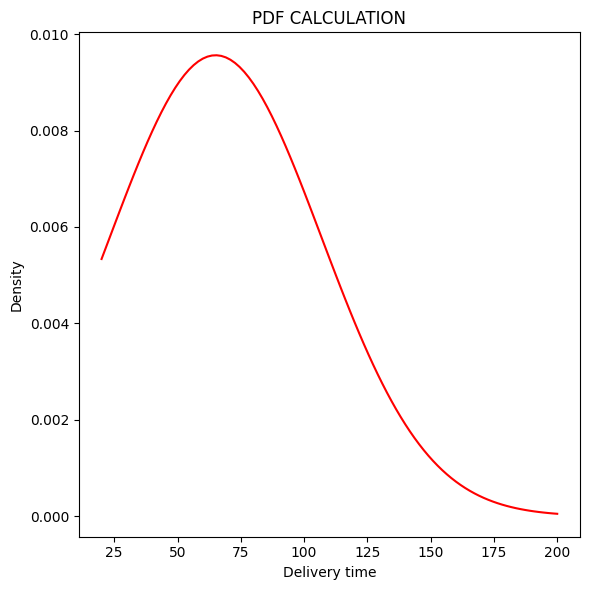

In [48]:
#●	Plot the Probability Density Function (PDF) to visualize the distribution

x=np.linspace(delivery_time.min(),delivery_time.max(),100)
pdf1=norm.pdf(x,mu,sigma)
plt.figure(figsize=(6,6))
plt.plot(x,pdf1,color='red')
plt.xlabel("Delivery time")
plt.ylabel("Density")
plt.title("PDF CALCULATION")
plt.tight_layout()
plt.show()

